In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
#Q1-Read the data https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv
diamond=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv')

The description of dataset is given below.

•	ID: Uniquely identifies each observation (diamond)

•	Carat Weight: The weight of the diamond in metric carats. One carat is equal to 0.2 grams, roughly the same weight as a paperclip

•	Cut: One of five values indicating the cut of the diamond in the following order of desirability (Signature-Ideal, Ideal, Very Good, Good, Fair)

•	Color: One of six values indicating the diamond's color in the following order of desirability (D, E, F - Colorless, G, H, I - Near colorless)

•	Clarity: One of seven values indicating the diamond's clarity in the following order of desirability (F - Flawless, IF - Internally Flawless, VVS1 or VVS2 - Very, Very Slightly Included, or VS1 or VS2 - Very Slightly Included, SI1 - Slightly Included)

•	Polish: One of four values indicating the diamond's polish (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Symmetry: One of four values indicating the diamond's symmetry (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Report: One of of two values "AGSL" or "GIA" indicating which grading agency reported the qualities of the diamond qualities

•	Price: The The amount in USD that the diamond is valued


In [67]:
#Q2-Get first 2 rows of data
diamond.head(2)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470


In [68]:
#Q3-Check if there is missing value
diamond.isnull().sum()

,0
Carat Weight,0
Cut,0
Color,0
Clarity,0
Polish,0
Symmetry,0
Report,0
Price,0


In [69]:
#Q4- Get data information and number of rows and columns
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [70]:
#Q5-Get descriptive statistics of data
diamond.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


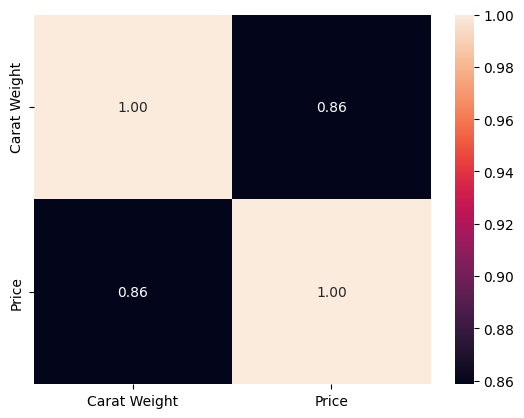

In [71]:
#Q6-Use seasoborns heat map to generate following heatmap
# annot = True to print the correlation inside the square
numerical_features=diamond.select_dtypes(include=np.number).columns
correlation_matrix=diamond[numerical_features].corr()
sns.heatmap(correlation_matrix,annot = True, fmt='.2f')
plt.show()

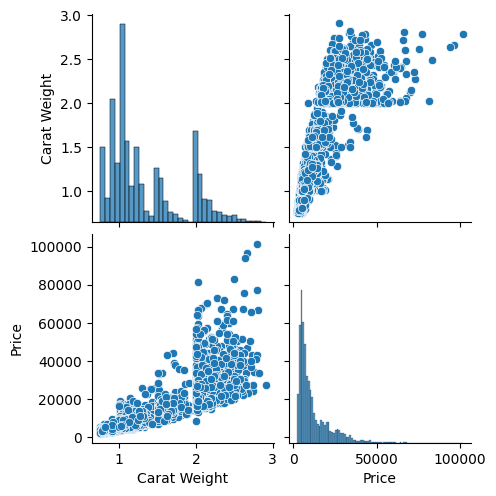

In [72]:
#Q7-Use seasoborns paiplot to generate following  diagram
sns.pairplot(diamond)
plt.show()

In [73]:
#Q8-Divide the data so that get Price as ouput variable (Y) and other variables as input varable (X)
X=diamond.drop('Price',axis=1)
Y=diamond['Price']
print(X)
print(Y)

      Carat Weight              Cut Color Clarity Polish Symmetry Report
0             1.10            Ideal     H     SI1     VG       EX    GIA
1             0.83            Ideal     H     VS1     ID       ID   AGSL
2             0.85            Ideal     H     SI1     EX       EX    GIA
3             0.91            Ideal     E     SI1     VG       VG    GIA
4             0.83            Ideal     G     SI1     EX       EX    GIA
...            ...              ...   ...     ...    ...      ...    ...
5995          1.03            Ideal     D     SI1     EX       EX    GIA
5996          1.00        Very Good     D     SI1     VG       VG    GIA
5997          1.02            Ideal     D     SI1     EX       EX    GIA
5998          1.27  Signature-Ideal     G     VS1     EX       EX    GIA
5999          2.19            Ideal     E     VS1     EX       EX    GIA

[6000 rows x 7 columns]
0        5169
1        3470
2        3183
3        4370
4        3171
        ...  
5995     6250
5

In [74]:
#Q9-Create dummy for the input variables (X)
X=pd.get_dummies(X, drop_first=True)
X

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1.10,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,0.83,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,0.85,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.91,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.83,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5996,1.00,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
5997,1.02,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5998,1.27,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [75]:
#Q10 -Split the input and output data into two parts: test data (20%) and train data(%80)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4800, 23)
(4800,)
(1200, 23)
(1200,)


In [76]:
def evalmetric(y,ypred):
 import numpy as np
 e = y - ypred
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 r2_f = 1-(sum(e**2)/sum((y-np.mean(y))**2))
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", r2_f)

In [77]:
#Q11 Use Linear regression to evaluate the performance of test and train data of Linear model  using evalmetric
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train,y_train)

print('Evaluation of performance of training data with Linear Regression')
predT_lr=linear_regression_model.predict(X_train)
evalmetric(y_train, predT_lr)

print()

print('Evaluation of performance of test data with Linear Regression')
pred_lr=linear_regression_model.predict(X_test)
evalmetric(y_test,pred_lr)

Evaluation of performance of training data with Linear Regression
MSE: 13617878.611029424
RMSE: 3690.240996334714
MAE: 2420.3923973752335
MAPE: 28.436213974145286
R-Squared: 0.8677546171602639

Evaluation of performance of test data with Linear Regression
MSE: 16395263.35943688
RMSE: 4049.1064890216066
MAE: 2386.8817587054814
MAPE: 27.98432467278652
R-Squared: 0.8461544250476121


Q12 -Based on the performance of test and training model, can we say there is overfitting or not in the performace of liner model?



Based on the performance of the linear regression model we see that it drops on the test data compared to the train data. However, the change is  not significant, and due to that we cannot say that it is overfitting.

In [78]:
#Q13- Use Lasso regression to evaluate the performance of test and train data   using evalmetric
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

print('Evaluation of performance of training data with Lasso Regression')
predT_lasso = lasso_model.predict(X_train)
evalmetric(y_train, predT_lasso)

print()

print('Evaluation of performance of test data with Lasso Regression')
pred_lasso = lasso_model.predict(X_test)
evalmetric(y_test, pred_lasso)


Evaluation of performance of training data with Lasso Regression
MSE: 13634771.172894873
RMSE: 3692.529102511566
MAE: 2423.671294929327
MAPE: 28.494802094772435
R-Squared: 0.8675905708080495

Evaluation of performance of test data with Lasso Regression
MSE: 16382531.14330739
RMSE: 4047.5339582648826
MAE: 2389.974136155326
MAPE: 28.046626630847136
R-Squared: 0.8462738982800888


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.937e+10, tolerance: 4.943e+07
  model = cd_fast.enet_coordinate_descent(


In [79]:
#Q14 Use Ridge regreesionto evaluate the performance of test and train data   using evalmetric
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

print('Evaluation of performance of training data with Ridge Regression')
predT_ridge = ridge_model.predict(X_train)
evalmetric(y_train, predT_ridge)

print()

print('Evaluation of performance of test data with Ridge Regression')
pred_ridge = ridge_model.predict(X_test)
evalmetric(y_test, pred_ridge)

Evaluation of performance of training data with Ridge Regression
MSE: 13945142.760987546
RMSE: 3734.3195847419843
MAE: 2436.0590762300158
MAPE: 28.66555995681942
R-Squared: 0.864576503003344

Evaluation of performance of test data with Ridge Regression
MSE: 16354795.887182316
RMSE: 4044.1063150197124
MAE: 2400.4165468663386
MAPE: 28.230792730281756
R-Squared: 0.8465341531068318


Q15- Did you get any improvement on test data using Ridge and Lasso?
Explain why?

No, I didn't get any noticeable improvements using Ridge and Lasso models.Generally Ridge and Lasso models add penalty term to the loss function reducing overfitting.Since we didn't have overfitting in our linear regression model, Ridge and Lasso models haven't shown any significant improvement.

In [80]:
#Q16-Use Decison Tree Regression to evaluate the performance of test and train data   using evalmetric
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

print('Evaluation of performance of training data with Decision Tree Regression')
predT_dt = decision_tree_model.predict(X_train)
evalmetric(y_train, predT_dt)

print()

print('Evaluation of performance of test data with Decision Tree Regression')
pred_dt = decision_tree_model.predict(X_test)
evalmetric(y_test, pred_dt)

Evaluation of performance of training data with Decision Tree Regression
MSE: 83753.97633482143
RMSE: 289.40279254841585
MAE: 77.53468948412699
MAPE: 0.7629440866398477
R-Squared: 0.999186651828738

Evaluation of performance of test data with Decision Tree Regression
MSE: 3377642.2571009025
RMSE: 1837.836297688372
MAE: 888.5465218253969
MAPE: 7.167853834215014
R-Squared: 0.9683057659010964


In [81]:
#Q17-Use Random Forest to evaluate the performance of test and train data   using evalmetric
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

print('Evaluation of performance of training data with Random Forest Regression')
predT_rf = random_forest_model.predict(X_train)
evalmetric(y_train, predT_rf)

print()

print('Evaluation of performance of test data with Random Forest Regression')
pred_rf = random_forest_model.predict(X_test)
evalmetric(y_test, pred_rf)

Evaluation of performance of training data with Random Forest Regression
MSE: 459930.07480541855
RMSE: 678.181446815982
MAE: 315.2863189831003
MAPE: 2.5137504528128867
R-Squared: 0.995533545968541

Evaluation of performance of test data with Random Forest Regression
MSE: 1662704.1117658145
RMSE: 1289.4588445413117
MAE: 664.0046578063602
MAPE: 5.445649651388347
R-Squared: 0.9843979529671247


Q18-Why Random forest perform better than Decison Tree on test data?


Random forest model performs better than decision tree model most probably since it generalizes on unseen data determining patterns whereas decision tree model is overfitting. We can conclude it from their performances, while both models' performance drop on test data, decision tree model's performance decreases much more, which indicates overfitting.

Q19- Which regression technique among Linear Regresssion, Lasso Regression ,Ridge Regression, Decision Tree and Random Forest  provide best performance on test data?


Random forest.